---
# <font color="#CA3532">Deep Learning Fundamentals and Basic Tools (2023/2024) - Lab Assignment 3</font>
---

Last updated on 2023-10-11

Please report any bugs to luis.lago@uam.es



---

This third lab includes the following tasks:

- The implementation of simple models using [PyTorch](https://pytorch.org/).

- The implementation of a convolutional neural network for the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) problem, including hyperparameter optimization.

### <font color="#CA3532">Clone the lab's github repo</font>

The easiest way of having all the lab material available from *Colab* is to clone our github repository:

In [ ]:
!git clone https://github.com/luisferuam/DLFBT-LAB

Cloning into 'DLFBT-LAB'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 146 (delta 7), reused 11 (delta 2), pack-reused 128
Receiving objects: 100% (146/146), 7.45 MiB | 15.13 MiB/s, done.
Resolving deltas: 100% (72/72), done.


### <font color="#CA3532">Instructions</font>

- The assignment must be done in pairs.

- All the exercises are described in this notebook. You must code your solutions in the file ``dlfbt_lab3.py`` provided as part of the material. Just complete the sections in the code marked with ``TO-DO`` comments.

- The results for exercise 3, including the hyperparameter search, must be included at the end of this notebook.

- Create a zip file containing both the ``dlfbt_lab3.py`` and this notebook and upload it to the [course Moodle page](https://posgrado.uam.es/course/view.php?id=57185) before the due date.

- **Due date:** Friday, 2023-10-27, 23:59.

### <font color="#CA3532">Import the libraries</font>

The following code cells import the required libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pickle

from time import time
import shutil

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import torch

In [ ]:
import sys
sys.path.append('DLFBT-LAB')
import dlfbt

### <font color="#CA3532">Introduction to PyTorch</font>

[PyTorch](https://pytorch.org/) is an open source machine learning framework that may be a good alternative to [TensorFlow](https://www.tensorflow.org/). It is usually the preferred option amongst the academic comunity because it offers more flexibility and hence it is easier to build custom models. However it lacks a high level layer like [Keras](https://keras.io/), so development could be a bit harder.

In this first part of the lab you will be introduced to the PyTorch framework.

Follow the introductory tutorial in the [PyTorch 60-Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) and then solve the exercises.


### <font color="#CA3532">Automatic differentiation with PyTorch</font>

As you have seen in the tutorial, the flag ``requires_grad=True`` may be used when creating a tensor to indicate that we will compute gradients with respect to it:

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


Now, whenever we perform an operation with this tensor, the new tensor that results from this operation includes a function to compute the gradient (``grad_fn``):

In [ ]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


Another example follows:

In [ ]:
z = y * y * 3
out = z.mean()

print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


To compute the gradients we must run the *backward pass* on the output tensor:

In [ ]:
out.backward()

And then we can access the gradient using the ``grad`` field:

In [ ]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


A simpler example, with scalar variables $x$ and $y$, follows:

$$
z = 2x^{2}y
$$

In [ ]:
x = torch.tensor(2., requires_grad=True)
print(x)
y = torch.tensor(3., requires_grad=True)
print(y)
z = 2*x*x*y
print(z)

tensor(2., requires_grad=True)
tensor(3., requires_grad=True)
tensor(24., grad_fn=<MulBackward0>)


Backward pass:

In [ ]:
z.backward()

Gradients:

$$
\frac{dz}{dx} = 4xy
$$

$$
\frac{dz}{dy} = 2x^{2}
$$


In [ ]:
print(x.grad)
print(y.grad)

tensor(24.)
tensor(8.)


### <font color="#CA3532">Exercise 1: Gradient descent to find the minimum of a function</font>

In the file ``dlfbt_lab3.py``, complete the code of the function ``gradient_descent_pytorch(f, x0, learning_rate, niters)`` that finds a minimum of a function using gradient descent. The function receives the following arguments:

- ``f``: the function to minimize
- ``x0``: the initial value
- ``learning_rate``: the learning rate
- ``niters``: the number of iterations

The function returns a Numpy array with all the values of $x$.

You can run the following code to test your implementation.


In [ ]:
from dlfbt_lab3 import gradient_descent_pytorch

Find the mimimum of the function $f(x) = (x-4)^{2}$:

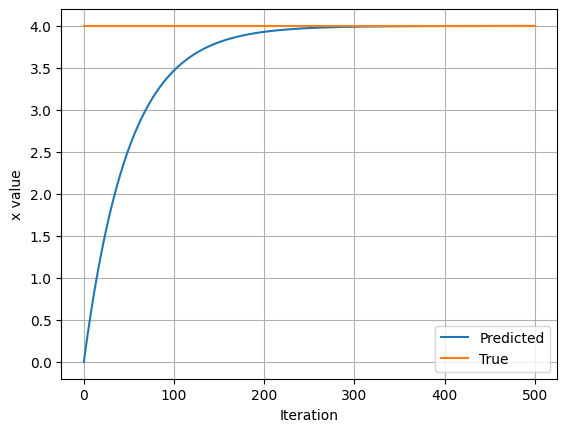

In [ ]:
f = lambda x : (x - 4)**2
x_history = gradient_descent_pytorch(f, 0.0, 1.e-2, 500)

# Plot x versus iteration:
plt.plot(x_history)
plt.plot([0, 500], [4, 4])
plt.grid(True)
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()

Find a local mimimum of the function $f(x) = \cos x$:

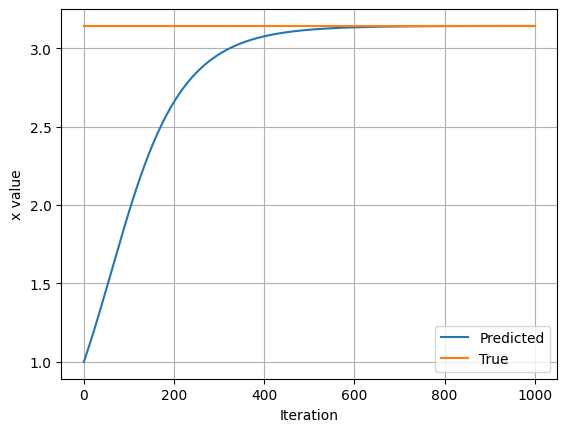

In [ ]:
f = lambda x : torch.cos(x)
x_history = gradient_descent_pytorch(f, 1.0, 1.e-2, 1000)

# Plot x versus iteration:
plt.plot(x_history)
plt.plot([0, 1000], [np.pi, np.pi])
plt.grid(True)
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()

### <font color="#CA3532">Exercise 2: Linear regression using pytorch</font>

Re-implement the ``LinearRegressionModel`` class of lab 1 using PyTorch.

Complete the code of the class ``LinearRegressionModel_pytorch`` by filling all the ``TO-DO`` blocks, so that it implements a Linear Regression model.

In [ ]:
from dlfbt_lab3 import LinearRegressionModel_pytorch

Run the following tests to check your implementation.

Test the ``predict`` method:

In [ ]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(noise=0.0, n=500)

linrm = LinearRegressionModel_pytorch()
linrm.w = torch.tensor(dg.a, requires_grad=True)
linrm.b = torch.tensor(dg.b, requires_grad=True)

y = linrm.predict(dg.x).detach()

tol = 1.e-8
assert y.shape == (500, 1)
assert np.abs(y - dg.t).max() < tol
assert linrm.get_loss(dg.x, dg.t) < tol

Test the ``compute_gradients`` method:

In [ ]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(n=50000, seed=17)

linrm = LinearRegressionModel_pytorch()
linrm.w = torch.tensor(dg.a, requires_grad=True)
linrm.b = torch.tensor(dg.b, requires_grad=True)

db, dw = linrm.compute_gradients(dg.x, dg.t)

tol = 1.e-8
assert db.shape == (1, 1)
assert np.abs(db[0][0] + 0.00704326) < tol
assert dw.shape == (4, 1)
assert np.abs(dw[0][0] + 0.05353578) < tol
assert np.abs(dw[1][0] + 0.03276935) < tol
assert np.abs(dw[2][0] + 0.00337341) < tol
assert np.abs(dw[3][0] + 0.03293776) < tol

Test the ``fit`` method:

In [ ]:
dg = dlfbt.DataGeneratorLinear(a=[2.0, 2.0])
dg.create_dataset(n=500, seed=17)

linrm = LinearRegressionModel_pytorch(2)
linrm.w = torch.tensor([[-2.0], [-2.0]], dtype=torch.float64, requires_grad=True)
linrm.b = torch.tensor([[-3.0]], dtype=torch.float64, requires_grad=True)

loss = linrm.fit(dg.x, dg.t, 0.01, 100)

tol = 1.e-8
assert np.abs(loss[-1] - 2.660068435196912) < tol

Plot loss vs iteration:

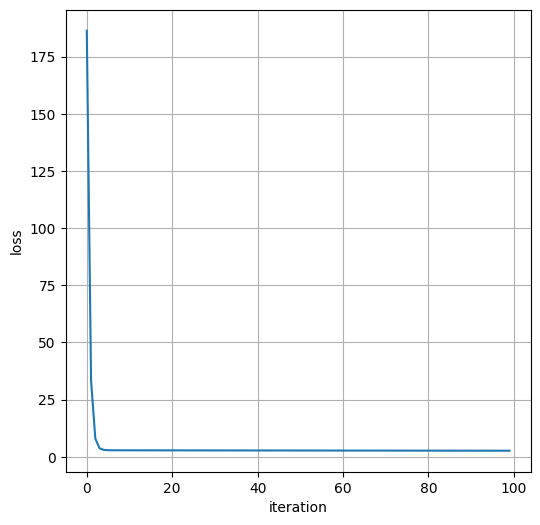

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid(True)
plt.show()

### <font color="#CA3532">Neural networks in pytorch</font>



We will build a simple feedforward neural network to classify the digits in the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The next cell loads the data:

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(train_labels)

print(test_images.shape)
print(test_labels.shape)
print(test_labels)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
(10000,)
[7 2 1 ... 4 5 6]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Definition of a class that implements the neural network (only the forward pass):

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # Note that we are not explicitly applying a softmax function
        return x

NN instantiation:

In [ ]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


Network parameters:

In [ ]:
params = list(net.parameters())
print(len(params))

for p in params:
  print(p.size())

4
torch.Size([64, 784])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


Let us apply this network to a sample image:

(28, 28)
target = 0


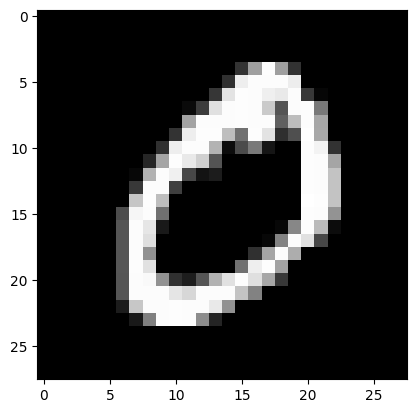

tensor([[  3.5888,   4.1849,  26.2973,  18.4148,   3.2931,  18.3883, -17.6509,
           5.3238,  37.1498,   6.5585]], grad_fn=<AddmmBackward0>)


In [ ]:
print(train_images[1].shape)
print("target =", train_labels[1])
plt.imshow(train_images[1], cmap='gray')
plt.show()

# Image to tensor:
input = torch.tensor(train_images[1], dtype=torch.float)

# Predict:
out = net(input)
print(out)

Define the optimizer:

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Network training:

In [ ]:
niters = 1000
hh = []
for it in range(niters):
    # Generate random mini-batch:
    ix = np.random.permutation(60000)[:1000]
    x = torch.tensor(train_images[ix], dtype=torch.float)
    y = torch.tensor(train_labels[ix], dtype=torch.long)

    # Reset gradients:
    optimizer.zero_grad()

    # Forward pass:
    outputs = net(x)
    loss = criterion(outputs, y)

    # Backward pass:
    loss.backward()

    # Update:
    optimizer.step()

    # Print stats:
    print('[%d] loss: %.3f' % (it + 1, loss.item()))
    hh.append(loss.item())

Plot:

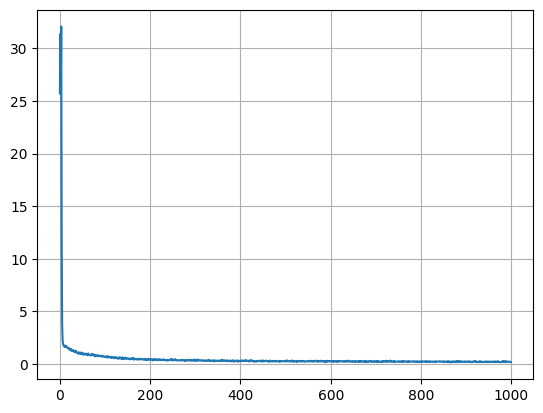

In [ ]:
plt.plot(hh)
plt.grid(True)
plt.show()

Let us classify the same image after training:

(28, 28)
target = 0


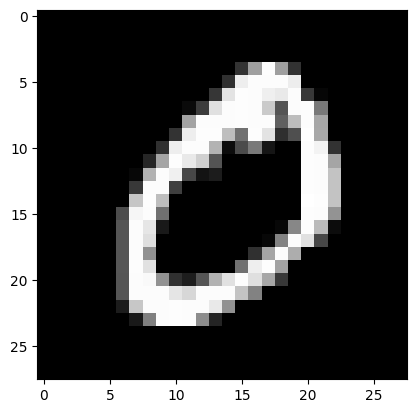

tensor([[ 39.3639, -23.4889, -20.0544,  -9.9259, -21.2908,   6.1427,  12.5368,
          26.4651, -15.9980,  19.0357]], grad_fn=<AddmmBackward0>)


In [ ]:
print(train_images[1].shape)
print("target =", train_labels[1])
plt.imshow(train_images[1], cmap='gray')
plt.show()

# Image to tensor:
input = torch.tensor(train_images[1], dtype=torch.float)

# Predict:
out = net(input)
print(out)

Now the highest output is assigned to the correct target.

Accuracy on training data:

In [ ]:
input = torch.tensor(train_images, dtype=torch.float)
out = net(input)
_, predicted = torch.max(out, 1)
(predicted.numpy() == train_labels).sum() / 60000

0.94215

Accuracy on test data:

In [ ]:
input = torch.tensor(test_images, dtype=torch.float)
out = net(input)
_, predicted = torch.max(out, 1)
(predicted.numpy() == test_labels).sum() / 10000

0.9371

PyTorch offers some utilities to process batches of data:


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader

Let us build ``DataLoader``s for training and test data:

In [ ]:
tensor_x = torch.tensor(train_images, dtype=torch.float)
tensor_y = torch.tensor(train_labels, dtype=torch.long)
train_dataset = TensorDataset(tensor_x, tensor_y)
train_dataloader = DataLoader(train_dataset, batch_size=1000, shuffle=True)

tensor_x = torch.tensor(test_images, dtype=torch.float)
tensor_y = torch.tensor(test_labels, dtype=torch.long)
test_dataset = TensorDataset(tensor_x,tensor_y)
test_dataloader = DataLoader(test_dataset, batch_size=1000, shuffle=True)

New network:

In [ ]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Reimplement the training loop using epochs and batches:

In [ ]:
nepochs = 10
hh = []
for it in range(nepochs):
  rloss = 0.0
  for x, t in train_dataloader:
    # Reset gradients to 0:
    optimizer.zero_grad()

    # Forward pass:
    outputs = net(x)
    loss = criterion(outputs, t)

    # Backward pass:
    loss.backward()

    # Actualización de los pesos:
    optimizer.step()

    # Acumulo loss:
    rloss += loss.item()

  # Imprimir loss de la época:
  print('[%d] loss: %.3f' % (it + 1, rloss))
  hh.append(rloss)

[1] loss: 175.088
[2] loss: 31.620
[3] loss: 24.841
[4] loss: 21.436
[5] loss: 18.942
[6] loss: 16.986
[7] loss: 15.836
[8] loss: 14.909
[9] loss: 14.267
[10] loss: 13.813


Accuracy on training and test data:

In [ ]:
input = torch.tensor(train_images, dtype=torch.float)
out = net(input)
_, predicted = torch.max(out, 1)
(predicted.numpy() == train_labels).sum() / 60000

0.9340666666666667

In [ ]:
input = torch.tensor(test_images, dtype=torch.float)
out = net(input)
_, predicted = torch.max(out, 1)
(predicted.numpy() == test_labels).sum() / 10000

0.9241

### <font color="#CA3532">Exercise 3: Convolutional Neural Network with pytorch</font>

Use PyTorch to implement a convolutional neural network and apply it to classify the images of the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. The network should have at least the following characteristics:

- Convolutional layers.
- Pooling layers.
- Some regularization mechanism, such as dropout or L2 regularization, to avoid overfitting.

In addition, your work should meet the following requirements:

- The network must obtain at least **78%** accuracy on the test set.
- You must use data augmentation.
- You must do hyperparameter tuning to find the best model.

Regarding the last point, at least the following hyperparameters must be considered:

- The learning rate.
- The optimizer (SGD, Adam, for example).
- The number of convolutional layers and filters, and the filter size.
- The regularization parameters (dropout rate, for example).

*Notes:*

- The example in the PyTorch [Training a classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) tutorial may be a good starting point.

- You can check the available PyTorch layers in the [torch.nn](https://pytorch.org/docs/stable/nn.html) module documentation.

- In order to perform n-fold cross validation, you may consider using the class [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) from the scikit-learn [model selection package](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).

- Finally, take into account that it will be very slow to do the hyperparameter search, so do not leave the work for the last day. In order to speed up the search process, you can reduce the number of epochs to a minimum value (even 1 epoch could be enough). But remember to retrain the final model with the whole training dataset for a sufficient number of epochs.

*What you must turn in:*

- All the code (functions, classes) should be included in the file ``dlfbt_lab3.py``.
- Use this notebook to import the code, run the hyperparameter search, do all the necessary tests and show the final results.
- Include explanations and a brief conclusion.



